# Figure 5 - land cover influence

This notebook explores the relationship between land cover, biophony, and the sound exposure level (SEL).

#### import statements

In [1]:
import pandas
import numpy
from matplotlib import pyplot
from matplotlib.lines import Line2D
%matplotlib inline

from figutils import style

#### formatting

In [2]:
style.set_font()

#### data sources

acoustic and land cover values

In [3]:
data = pandas.read_csv("")
data = data[data.site <= 30]
values = data[['site', 'building_500m', 'pavement_500m', 'forest_500m', 'd2n_500m', 'sel', 'biophony']].groupby('site').mean()
values.sort_values(by=['d2n_500m'], inplace=True)

land cover percent areas

In [4]:
landcover = pandas.read_csv("")
landcover = landcover[landcover.IncludedArea == '500m']
landcover = landcover[landcover.SiteID <= 30]
landcover.set_index('SiteID', drop='False', inplace=True)
landcover.sort_index(inplace=True)

land cover colors and site names

In [5]:
colors = pandas.read_csv("").set_index('ID')
site_names = data.sort_values(by='site').site_name.unique()
# buffer area (r = 500m)
full_area = 775665.717

join land cover areas with the data

In [6]:
landcover = values.join(landcover)

#### plot

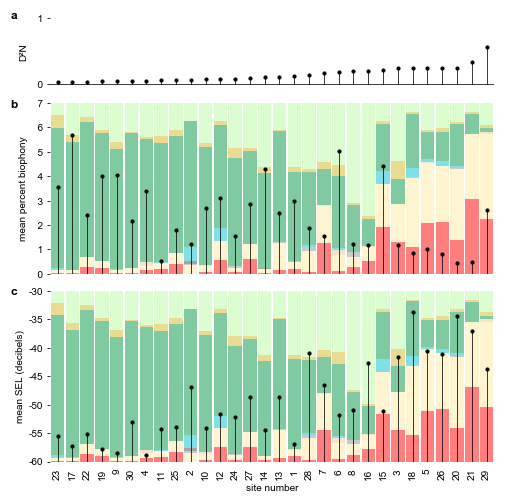

In [7]:
figure = pyplot.figure()
figure.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.98, wspace=0, hspace=0)

figure.set_figheight(6.85)
figure.set_figwidth(6.85)

ax_a = pyplot.subplot2grid((52, 1), (0, 0), rowspan=8, colspan=1)
ax_b = pyplot.subplot2grid((52, 1), (10, 0), rowspan=20, colspan=1, sharex=ax_a)
ax_c = pyplot.subplot2grid((52, 1), (32, 0), rowspan=20, colspan=1, sharex=ax_a)

ID = numpy.array([ n for n in range(len(landcover)) ])
xticks = ID + 0.5


#-------------D2N-------------
ax_a.scatter(xticks, values.d2n_500m, c='black', s=10)
for n, i in enumerate(landcover.index):
    ax_a.add_line(Line2D([xticks[n], xticks[n]], [values.d2n_500m[i], 0], color='black', linewidth=0.75))
ax_a.set_frame_on(False)

ax_a.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=False, labelleft=True, direction='out')

ax_a.add_line(Line2D([0, len(landcover)], [0, 0], color='black', linewidth=0.75))

ax_a.set_yticks([0, 1])
ax_a.set_yticklabels(['  0', '  1'])
ax_a.set_ylabel('D' + u'\u00B2' + 'N')


#-------------biophony-------------
bar_width = 0.9
SiteIDs = values.index
left = ID + 0.5
height = numpy.zeros(len(landcover))
bottom = numpy.zeros(len(landcover))
for index, column in landcover.loc[:,'1':'15'].iteritems():
    height = (column.as_matrix() / full_area) * 100
    ax_b.bar(x=left, 
            height=height, 
            bottom=bottom,
            width=bar_width,
            color=colors['Color'][int(index)],
            edgecolor=None,
            linewidth=0,
            alpha=0.5)
    bottom = bottom + height

# format
ax_b.set_xlim(0, 30)
ax_b.set_ylim(0, 100)
ax_b.set_ylabel('mean percent biophony')
ax_b.set_frame_on(False)

# title formatting
title_font = {
    'size': 12.0,
    'weight': 'bold'
}

# formatting
ax_b.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=False, labelleft=True, direction='out')

y = values['biophony']
ymin = numpy.around(y.min() - 1)
y_zeroed = y - ymin
ymax = numpy.around(y_zeroed.max() + 1)
y_trans = (y_zeroed / ymax) * 100

yticks = numpy.arange(ymin, numpy.around(y.max() + 5, decimals=-1) + 5, 5)
yticks_trans = [((n - yticks.min()) /  (yticks.max() - yticks.min())) * 100 for n in yticks]
yticklabels = ["{0:.0f}".format(n) for n in yticks]
t = ax_b.set_yticks(yticks_trans)
tl = ax_b.set_yticklabels(yticklabels)

ax_b.scatter(numpy.arange(0, 30, 1) + 0.5, y_trans, c='black', zorder=2, s=10)
for n, i in enumerate(landcover.index):
    ax_b.add_line(Line2D([xticks[n], xticks[n]], [min(yticks_trans), y_trans[i]], color='black', linewidth=0.75))
    
yticks = numpy.arange(ymin, numpy.around(y.max()) + 1, 1)
yticks_trans = [((n - yticks.min()) /  (yticks.max() - yticks.min())) * 100 for n in yticks]
yticklabels = ["  {0:.0f}".format(abs(n)) for n in yticks]
t = ax_b.set_yticks(yticks_trans)
tl = ax_b.set_yticklabels(yticklabels)


#-------------SEL-------------
bar_width = 0.9
SiteIDs = values.index
left = ID + 0.5
height = numpy.zeros(len(landcover))
bottom = numpy.zeros(len(landcover))
for index, column in landcover.loc[:,'1':'15'].iteritems():
    height = (column.as_matrix() / full_area) * 100
    ax_c.bar(x=left, 
            height=height, 
            bottom=bottom,
            width=bar_width,
            color=colors['Color'][int(index)],
            edgecolor=None,
            linewidth=0,
            alpha=0.5)
    bottom = bottom + height

# format
ax_c.set_xlim(0, 30)
ax_c.set_ylim(0, 100)
ax_c.set_xlabel('site number')
ax_c.set_ylabel('mean SEL (decibels)')
xticklabels = [site_names[n - 1] for n in SiteIDs]
xticklabels = [ "{0}".format(SiteIDs[i]) for i in ID ]
t = ax_c.set_xticks(xticks)
tl = ax_c.set_xticklabels(xticklabels, rotation='vertical')
ax_c.set_frame_on(False)

# formatting
ax_c.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=True, labelleft=True, direction='out')

y = values['sel']
ymin = numpy.around(y.min() - 5, decimals=-1)
y_zeroed = y - ymin
ymax = numpy.around(y_zeroed.max() + 5, decimals=-1)
y_trans = (y_zeroed / ymax) * 100

yticks = numpy.arange(ymin, numpy.around(y.max() + 5, decimals=-1) + 5, 5)
yticks_trans = [((n - yticks.min()) /  (yticks.max() - yticks.min())) * 100 for n in yticks]
yticklabels = ["{0:.0f}".format(n) for n in yticks]
t = ax_c.set_yticks(yticks_trans)
tl = ax_c.set_yticklabels(yticklabels)

ax_c.scatter(numpy.arange(0, 30, 1) + 0.5, y_trans, c='black', zorder=2, s=10)
for n, i in enumerate(landcover.index):
    ax_c.add_line(Line2D([xticks[n], xticks[n]], [min(yticks_trans), y_trans[i]], color='black', linewidth=0.75))

# title formatting
title_font = {
    'size': 12.0,
    'weight': 'bold'
}
ax_a2 = pyplot.axes([0, 0.87, 1, 0.125], facecolor=(1, 1, 1, 0), frameon=False)
ax_a2.tick_params(bottom=False, labelbottom=False,
                 top=False, labeltop=False,
                 left=False, labelleft=False,
                 right=False, labelright=False)
ax_b2 = pyplot.axes([0, 0.43, 1, 0.3846], facecolor=(1, 1, 1, 0), frameon=False)
ax_b2.tick_params(bottom=False, labelbottom=False,
                 top=False, labeltop=False,
                 left=False, labelleft=False,
                 right=False, labelright=False)
ax_c2 = pyplot.axes([0, 0.05, 1, 0.3846], facecolor=(1, 1, 1, 0), frameon=False)
ax_c2.tick_params(bottom=False, labelbottom=False,
                 top=False, labeltop=False,
                 left=False, labelleft=False,
                 right=False, labelright=False)

t1 = ax_a2.text(0, 1, 'a', horizontalalignment='left', verticalalignment='top', 
          fontdict=title_font)
t2 = ax_b2.text(0, 1, 'b', horizontalalignment='left', verticalalignment='top', 
          fontdict=title_font)
t2 = ax_c2.text(0, 1, 'c', horizontalalignment='left', verticalalignment='top', 
          fontdict=title_font)

#### save figure

In [8]:
figure.savefig("", dpi=150)